In [149]:
import pandas as pd
import numpy as np
import seaborn as sns

In [150]:
from matplotlib import pyplot as plt

TASK 1


In [151]:

df=pd.read_csv("/content/Daily_Public_Transport_Passenger_Boardings_By_Ticket_Type_20240513.csv")

In [152]:
df

,Date,MyWay,Paper Ticket
0,01/07/2019,66215,4325
1,15/09/2023,63800,7349
2,28/12/2021,9994,1882
3,11/01/2023,43769,3991
4,11/09/2021,3810,685
...,...,...,...
1773,19/01/2023,46083,4622
1774,16/08/2023,70115,6955
1775,10/01/2022,21932,2315
1776,04/05/2020,14842,854


In [153]:
print(df.head())
print(df.info())

         Date  MyWay  Paper Ticket
0  01/07/2019  66215          4325
1  15/09/2023  63800          7349
2  28/12/2021   9994          1882
3  11/01/2023  43769          3991
4  11/09/2021   3810           685
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1778 entries, 0 to 1777
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          1778 non-null   object
 1   MyWay         1778 non-null   int64 
 2   Paper Ticket  1778 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 41.8+ KB
None


EDA


In [154]:
df= df.drop_duplicates()

In [155]:
# Check for missing values
df.isnull().sum()

Date            0
MyWay           0
Paper Ticket    0
dtype: int64

In [156]:
df.describe()



,MyWay,Paper Ticket
count,1778.000000,1778.000000
mean,40985.889201,3744.153543
std,23275.162569,2153.562760
min,0.000000,13.000000
25%,17207.750000,1991.500000
50%,45079.500000,3374.500000
75%,60946.500000,5383.000000
max,88313.000000,10310.000000


<Axes: >

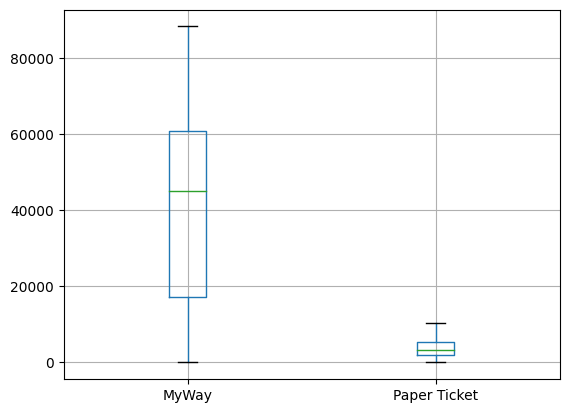

In [157]:
# Check for outliers
df.boxplot()

array([[<Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'MyWay'}>],
       [<Axes: title={'center': 'Paper Ticket'}>, <Axes: >]], dtype=object)

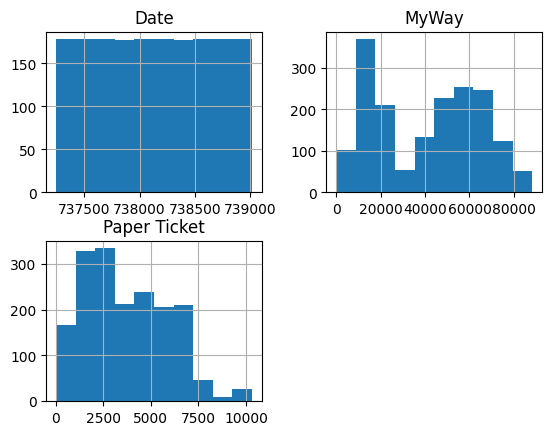

In [146]:
# Visualize the data
df.hist()


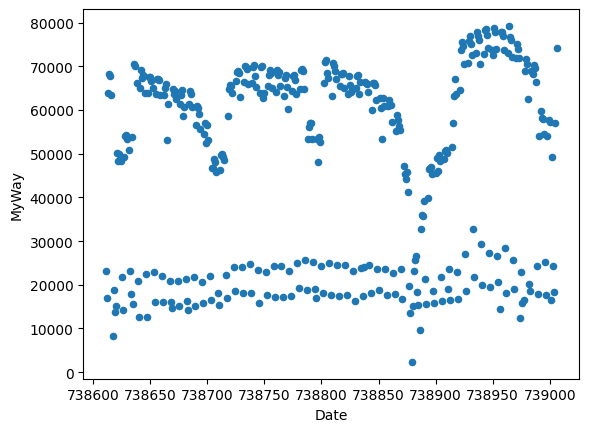

In [64]:
df.plot.scatter(x='Date', y='MyWay')
plt.show()

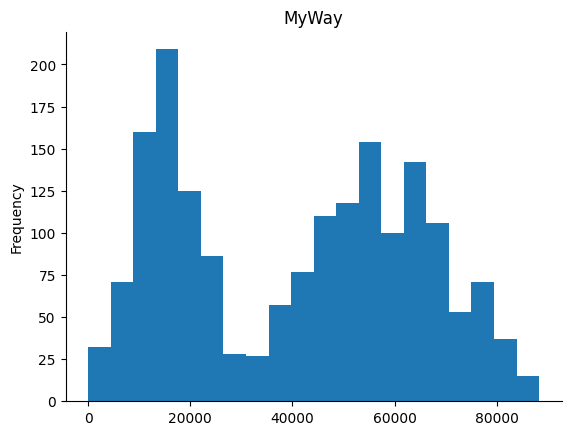

In [6]:
# @title MyWay

from matplotlib import pyplot as plt
df['MyWay'].plot(kind='hist', bins=20, title='MyWay')
plt.gca().spines[['top', 'right',]].set_visible(False)

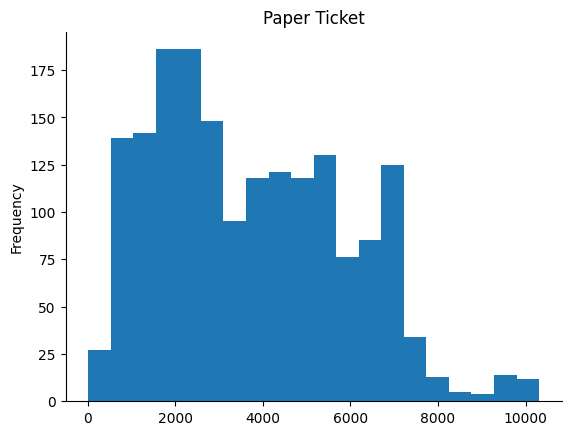

In [7]:
# @title paper ticket

df['Paper Ticket'].plot(kind='hist', bins=20, title='Paper Ticket')
plt.gca().spines[['top', 'right',]].set_visible(False)

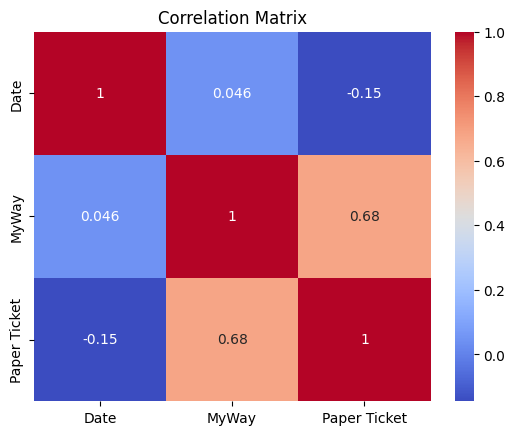

In [72]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [160]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [161]:
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)

<ipython-input-161-45a55d54a14d>:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)


In [162]:

df_filtered = df[df['Date'].between('2023-04-01', '2024-04-01')]

Filtered 1 year data

In [163]:
df_filtered

,Date,MyWay,Paper Ticket
1,2023-09-15,63800,7349
10,2023-08-29,69155,6507
19,2023-04-11,50246,4306
27,2023-09-17,19207,2368
33,2023-10-07,24249,3089
...,...,...,...
1766,2023-11-25,23664,4617
1767,2024-03-20,76782,1346
1768,2023-07-13,49311,4309
1774,2023-08-16,70115,6955


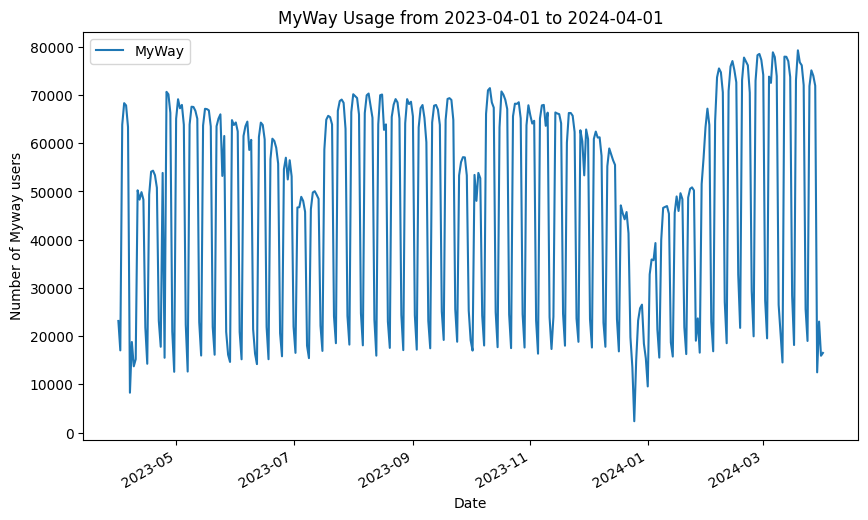

In [35]:
df_filtered.plot(x='Date', y='MyWay', kind='line', figsize=(10, 6))
plt.title('MyWay Usage from 2023-04-01 to 2024-04-01')
plt.xlabel('Date')
plt.ylabel('Number of Myway users')
plt.show()

In [106]:
df['Date'] = df['Date'].apply(lambda x: x.toordinal())


TASK 2


In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


WAY 1


In [125]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [126]:
data = pd.read_csv("/content/Daily_Public_Transport_Passenger_Boardings_By_Ticket_Type_20240513.csv")

In [128]:
# Correct date format
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

In [129]:
prediction = data[(data['Date'] >= '2024-05-01') & (data['Date'] <= '2024-05-07')][['Date', 'MyWay']].copy()

In [130]:
X = prediction.index.values.reshape(-1, 1)
y = prediction['MyWay']


In [131]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [133]:
reference = data['Date'].min()
next_week = pd.date_range(start='2024-05-01', end='2024-05-07')
next_week_days_since_reference = (next_week - reference).days.values.reshape(-1, 1)

In [135]:
next_week_predictions = model.predict(next_week_days_since_reference)


In [164]:
print("Date\t\tPredicted")
for date, prediction in zip(next_week, next_week_predictions):
    print(f"{date.strftime('%Y-%m-%d')}:\t{prediction}")

Date		Predicted
2024-05-01:	75575.28014257544
2024-05-02:	75606.69232993718
2024-05-03:	75638.10451729894
2024-05-04:	75669.5167046607
2024-05-05:	75700.92889202244
2024-05-06:	75732.34107938419
2024-05-07:	75763.75326674595


In [141]:
reference_date = data['Date'].min()
next_week_dates = pd.date_range(start='2024-05-01', end='2024-05-07')
next_week_days_since_reference = (next_week_dates - reference_date).days.values.reshape(-1, 1)

next_week_predictions = model.predict(next_week_days_since_reference)

print("Date\t\t\tPredicted")
for date, prediction in zip(next_week_dates, next_week_predictions):
    print(f"{date.strftime('%Y-%m-%d')}:\t\t{prediction}")


Date			Predicted
2024-05-01:		75575.28014257544
2024-05-02:		75606.69232993718
2024-05-03:		75638.10451729894
2024-05-04:		75669.5167046607
2024-05-05:		75700.92889202244
2024-05-06:		75732.34107938419
2024-05-07:		75763.75326674595


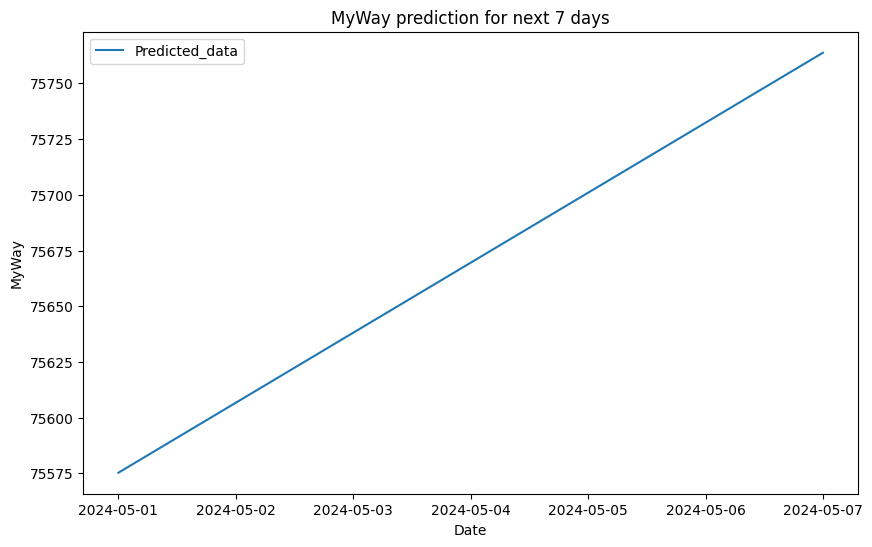

In [142]:
plt.figure(figsize=(10, 6))
plt.plot(next_week_dates, next_week_predictions, label='Predicted_data')
plt.title('MyWay prediction for next 7 days')
plt.xlabel('Date')
plt.ylabel('MyWay')
plt.legend()
plt.show()

way 2


In [111]:
import pandas as pd
from sklearn.linear_model import LinearRegression


# Generate dates for the next 7 days
next_7_days = pd.date_range(df_filtered['Date'].max() + pd.Timedelta(days=1), periods=7)

# Convert dates to timestamps (numeric representation)
next_7_days_numeric = next_7_days.astype(int).values.reshape(-1, 1)

# Predict the MyWay values for the next 7 days
predicted_myway = model.predict(next_7_days_numeric)

# Create a DataFrame to store the predicted MyWay values along with the corresponding dates
predicted_df = pd.DataFrame({'Date': next_7_days, 'Predicted_MyWay': predicted_myway})

# Print the predicted MyWay values for the next 7 days
print(predicted_df)


        Date  Predicted_MyWay
0 2024-04-02     5.572943e+18
1 2024-04-03     5.573224e+18
2 2024-04-04     5.573505e+18
3 2024-04-05     5.573787e+18
4 2024-04-06     5.574068e+18
5 2024-04-07     5.574349e+18
6 2024-04-08     5.574630e+18


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


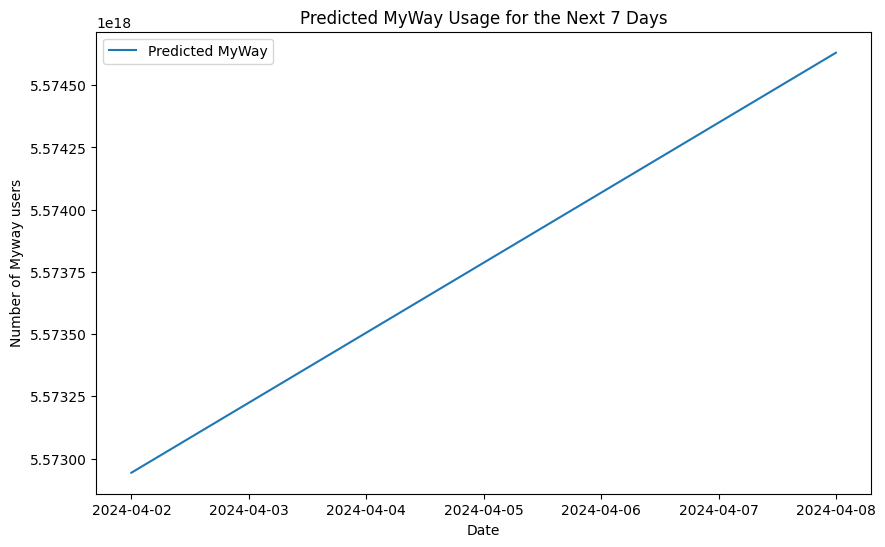

In [114]:
plt.figure(figsize=(10, 6))
plt.plot(predicted_df['Date'], predicted_df['Predicted_MyWay'], label='Predicted MyWay')
plt.xlabel('Date')
plt.ylabel('Number of Myway users')
plt.title('Predicted MyWay Usage for the Next 7 Days')
plt.legend()
plt.show()


way 3

In [144]:
import pandas as pd
from sklearn.linear_model import LinearRegression


model = LinearRegression()
model.fit(df[['Date']], df['MyWay'])


future_dates = pd.date_range(start='2024-05-01', end='2024-05-07')


future_dates_numeric = future_dates.astype(int).values.reshape(-1, 1)

predicted_myway = model.predict(future_dates_numeric)

# Print the predicted MyWay values for the next 7 days
for date, prediction in zip(future_dates, predicted_myway):
    print(f"MyWay prediction for {date}: {prediction}")


MyWay prediction for 2024-05-01 00:00:00: 5.581099137019189e+18
MyWay prediction for 2024-05-02 00:00:00: 5.581380385715875e+18
MyWay prediction for 2024-05-03 00:00:00: 5.58166163441256e+18
MyWay prediction for 2024-05-04 00:00:00: 5.581942883109245e+18
MyWay prediction for 2024-05-05 00:00:00: 5.58222413180593e+18
MyWay prediction for 2024-05-06 00:00:00: 5.582505380502616e+18
MyWay prediction for 2024-05-07 00:00:00: 5.582786629199301e+18


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
